# Hierarchical clustering  

## Types of clustering :-
## Introduction
- As the name itself suggests, Clustering algorithms group a set of data points into subsets or clusters.
- The algorithms' goal is to create clusters that are coherent internally, but clearly different from each other externally.
- In other words, entities within a cluster should be as similar as possible and entities in one cluster should be as dissimilar as possible from entities in another.
- Broadly speaking there are `two ways of clustering data points based on the algorithmic structure and operation`, namely `agglomerative` and `divisive`. 
- **Agglomerative** : An agglomerative approach begins with each observation in a distinct (singleton) cluster, and successively merges clusters together until a stopping criterion is satisfied.
- **Divisive** : A divisive method begins with all patterns in a single cluster and performs splitting until a stopping criterion is met.
- **agglomerative** or `bottom-up approach`, where you start with each data point as its own cluster and then combine clusters based on some similarity measure. The idea can be easily adapted for divisive methods as well.


## Measures of distance (similarity)
- The similarity between the clusters is often calculated from the dissimilarity measures like the euclidean distance between two clusters. So the larger the distance between two clusters, the better it is.
- There are many distance metrics that you can consider to calculate the dissimilarity measure, and the choice depends on the type of data in the dataset. 
- For example 
  - if you have continuous numerical values in your dataset you can use `euclidean distance`, 
  - if the data is binary you may consider the `Jaccard distance` (helpful when you are dealing with categorical data for clustering after you have applied one-hot encoding). 
  - Other distance measures include `Manhattan, Minkowski, Canberra etc`.
- The choice of distance metric should be made based on theoretical concerns from the domain of study.
- That is, a distance metric needs to define similarity in a way that is sensible for the field of study.
- For example, if clustering crime sites in a city, city block distance may be appropriate (or, better yet, the time taken to travel between each location). 
- Where there is no theoretical justification for an alternative, the Euclidean should generally be preferred, as it is usually the appropriate measure of distance in the physical world.

- Agglomerative clustering is a hierarchical cluster technique that builds nested clusters with a bottom-up approach where each data point starts in its own cluster and as we move up, the clusters are merged, based on a distance matrix.

- **Hierarchical clustering**, also known as **hierarchical cluster analysis**, is an algorithm that groups similar objects into groups called clusters.
- The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

- The key operation in hierarchical agglomerative clustering is to repeatedly combine the two nearest clusters into a larger cluster. 

### Algorithm for bottom-up (Agglomerative clustering)

1. It starts by calculating the distance between every pair of observation points and store it in a distance matrix.
2. It then puts every point in its own cluster.
3. Then it starts merging the closest pairs of points based on the distances from the distance matrix and as a result the amount of clusters goes down by 1.
4. Then it recomputes the distance between the new cluster and the old ones and stores them in a new distance matrix.
5. Lastly it repeats steps 2 and 3 until all the clusters are merged into one single cluster.

- Or In Simple words it can be stated as :-
- Hierarchical clustering starts by treating each observation as a separate cluster.
- Then, it repeatedly executes the following two steps:
  - (1) identify the two clusters that are closest together, and
  - (2) merge the two most similar clusters. 
  - This continues until all the clusters are merged together. 


### Inter-cluster linkage methods for merging clusters

- There are several ways to measure the distance between clusters in order to decide the rules for clustering,
- and they are often called **Linkage Methods**.
- Some of the common linkage methods are:
  - `Complete-linkage`: calculates the maximum distance between clusters before merging.
  - `Single-linkage`: calculates the minimum distance between the clusters before merging. This linkage may be used to detect high values in your dataset which may be outliers as they will be merged at the end.
  - `Average-linkage`: calculates the average distance between clusters before merging.
  - `Centroid-linkage`: finds centroid of cluster 1 and centroid of cluster 2, and then calculates the distance between the two before merging.
- The choice of linkage method entirely depends on you and there is no hard and fast method that will always give you good results. Different linkage methods lead to different clusters. 

- After selecting a distance metric, it is necessary to determine from where distance is computed.
- For example, it can be computed between the two most similar parts of a cluster `(single-linkage)`,
- the two least similar bits of a cluster `(complete-linkage)`,
- the center of the clusters `(mean or average-linkage)`, 
- or some other criterion. Many linkage criteria have been developed.

- As with distance metrics, the choice of linkage criteria should be made based on theoretical considerations from the domain of application.
- A key theoretical issue is what causes variation.
- For example, in archeology, we expect variation to occur through innovation and natural resources, so working out if two groups of artifacts are similar may make sense based on identifying the most similar members of the cluster.

- Where there are no clear theoretical justifications for choice of linkage criteria, `Ward’s method` is the sensible default.
- This method works out which observations to group based on reducing the sum of squared distances of each observation from the average observation in a cluster. 
- This is often appropriate as this concept of distance matches the standard assumptions of how to compute differences between groups in statistics (e.g., ANOVA, MANOVA).

**The main output of Hierarchical Clustering is a `dendrogram`, which shows the hierarchical relationship between the clusters**

### Dendrograms
- A dendrogram is a diagram representing a tree. This diagrammatic representation is frequently used in different contexts
- In hierarchical clustering, you categorize the objects into a hierarchy similar to a tree-like diagram which is called a dendrogram. 
-  once one large cluster is formed by the combination of small clusters, dendrograms of the cluster are used to actually split the cluster into multiple clusters of related data points

### Cophenetic coefficient and its importance in quality of the dendogram

- Given the large number of techniques, it is often difficult to decide which is best.
- One criterion that has become popular is to use the result that has largest `cophenetic correlation coefficient`.
- This is the correlation between the original distances and those that result from the cluster configuration. 
- Values above 0.75 are felt to be good. 
- The Group Average method appears to produce high values of this statistic. This may be one reason that it is so popular.
- This (very very briefly) compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. 
- The closer the value is to 1, the better the clustering preserves the original distances,

#### Loading the libraries:

In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist


In [3]:
from pylab import rcParams
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm

In [4]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [5]:
plt.style.use('seaborn-whitegrid')

#### load the dataset

In [6]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Visualization

#### method='single'

Z-Shape: (767, 4)


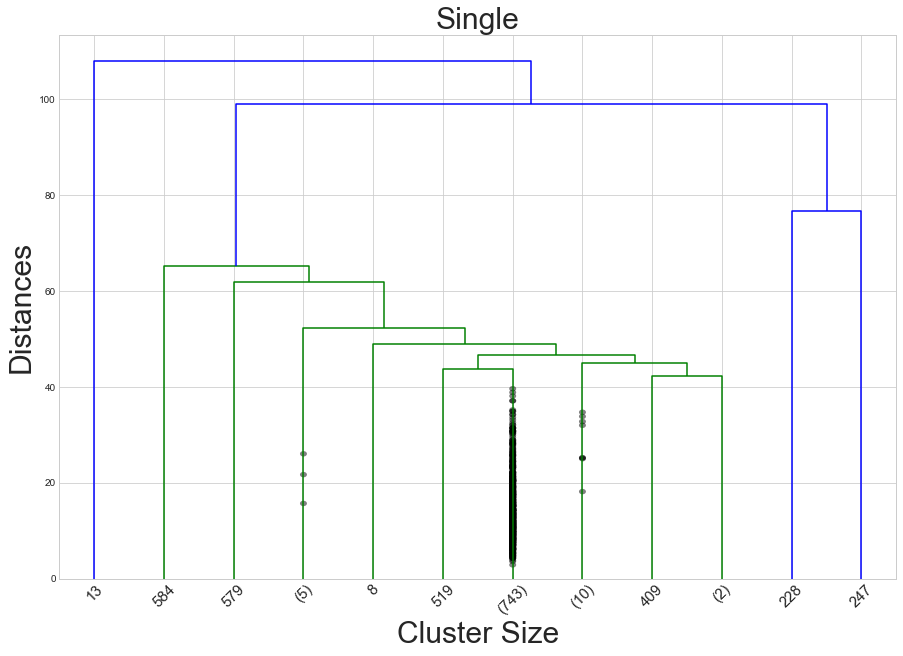

In [7]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='single')
print("Z-Shape:",Z.shape)
plt.title("Single",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

#### method='complete'

Z-Shape: (767, 4)


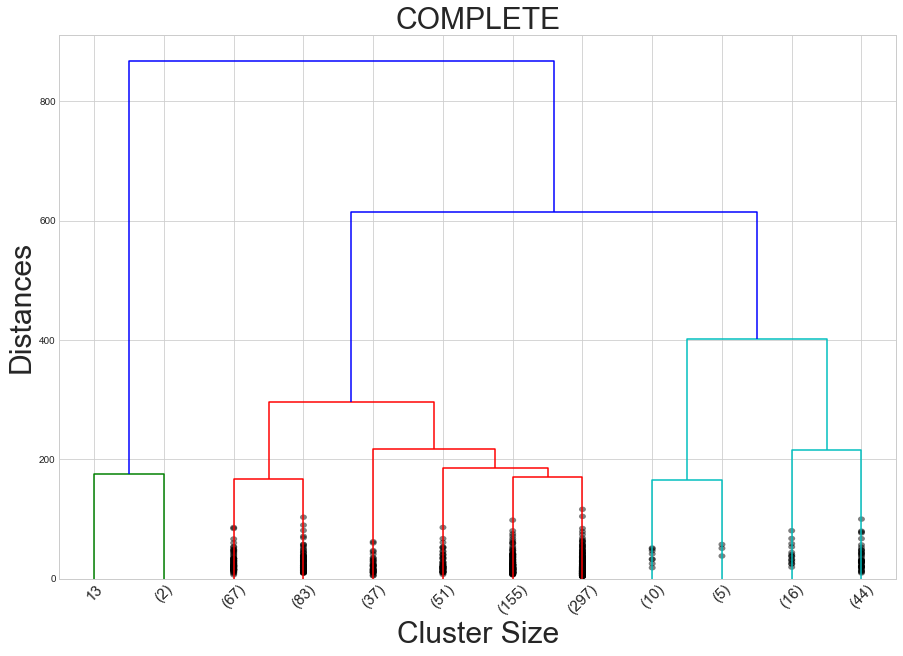

In [8]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='complete')
print("Z-Shape:",Z.shape)
plt.title("COMPLETE",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

#### method='average'

Z-Shape: (767, 4)


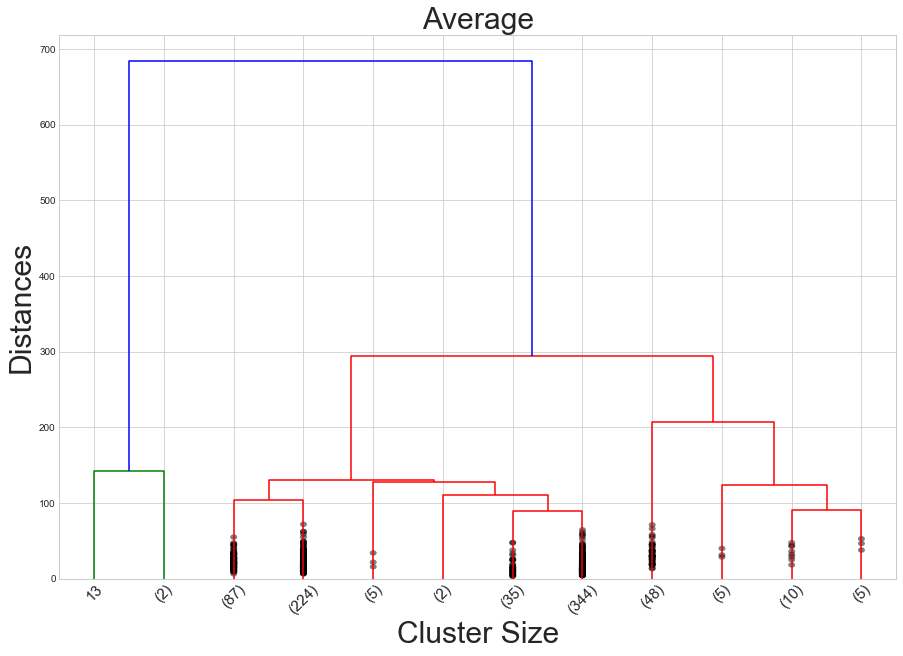

In [9]:

plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='average')
print("Z-Shape:",Z.shape)
plt.title("Average",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

#### ### method='weighted'

Z-Shape: (767, 4)


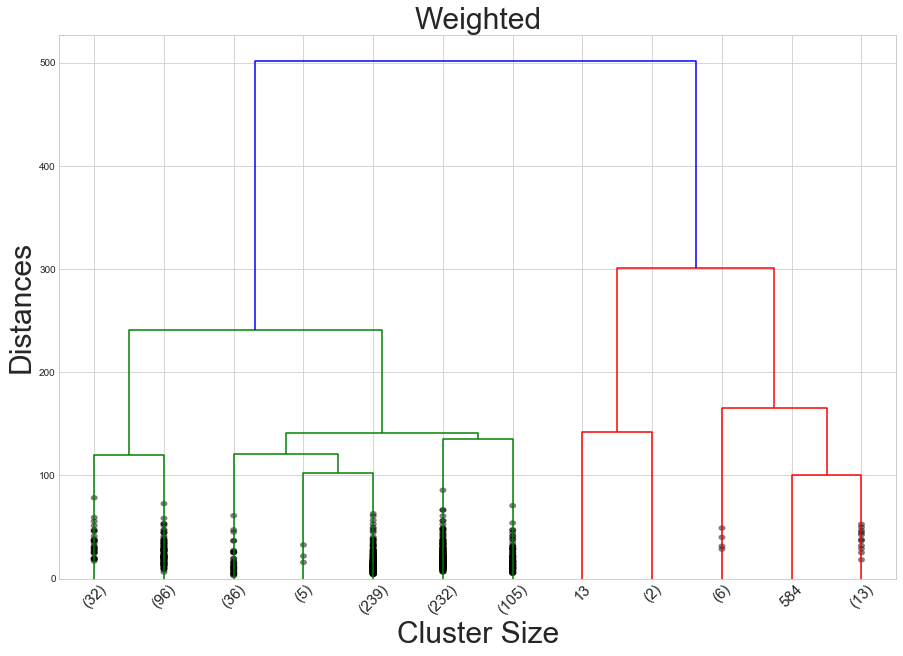

In [10]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='weighted')
print("Z-Shape:",Z.shape)
plt.title("Weighted",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

#### method='centroid'

Z-Shape: (767, 4)


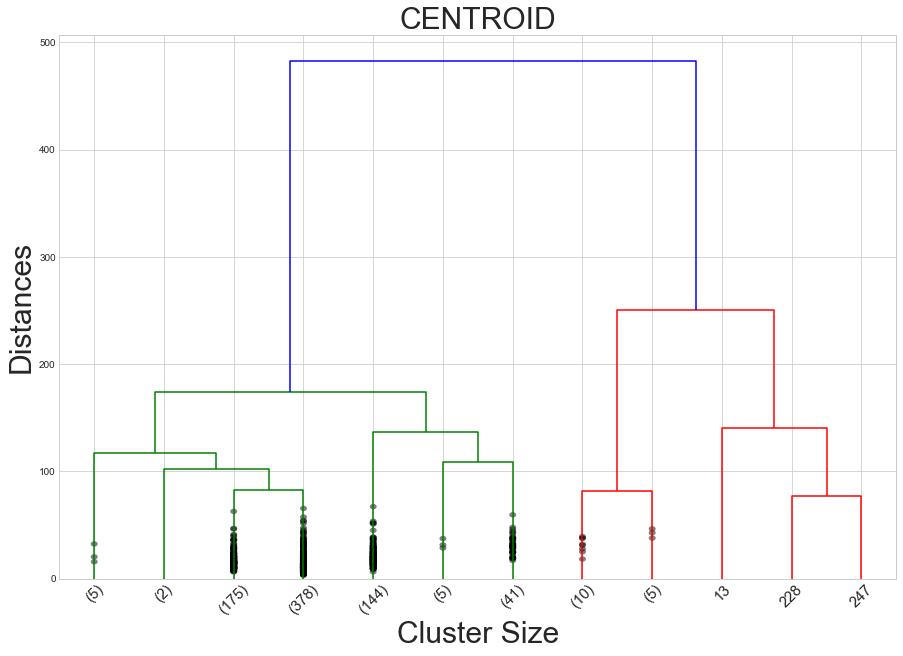

In [11]:
plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='centroid')
print("Z-Shape:",Z.shape)
plt.title("CENTROID",loc='center',size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.show()

#### method='ward' uses the Ward variance minimization algorithm.

Z-Shape: (767, 4)


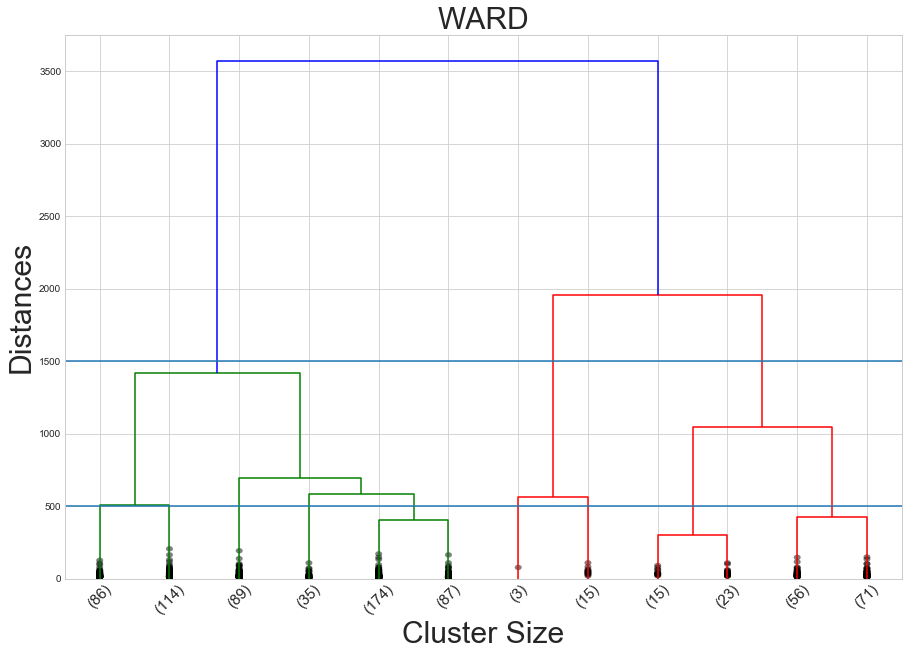

In [12]:

plt.figure(figsize=(15,10))
Z=linkage(df.drop(['Outcome'],axis=1),method='ward')
print("Z-Shape:",Z.shape)
plt.title("WARD",size=30)
dendrogram(Z,orientation='top',truncate_mode='lastp',p=12,get_leaves=False,leaf_rotation=45,leaf_font_size=15,show_contracted=True,)
plt.xlabel("Cluster Size",fontsize=30)
plt.ylabel("Distances",fontsize=30)
plt.axhline(y=500)
plt.axhline(y=1500)
plt.show()

## Pros and cons of Hierarchical  clustering :-
## PROS:-
- Dendogram are good for visualization
- Provides Hierarchical relations between clusters
- Does not require pre-defined no of clusters
- Accept any valid measure of distance
- Generates Smaller clusters which maybe helpful for discovery
## CONS:-
- Not easy to define level of clusters
-  Different Dendogram for different linkage methods